In [1]:
import os
from pathlib import Path


<H1>Importing the required library's</h1>

In [2]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 549E-A9F0

 Directory of C:\Users\Anand\AI_Methodology\AI_METHODOLY\notebooks

30-07-2022  14:59    <DIR>          .
30-07-2022  14:59    <DIR>          ..
29-07-2022  22:50                 0 .gitkeep
30-07-2022  08:33    <DIR>          .ipynb_checkpoints
30-07-2022  07:37           116,027 Creating_data_pipeline_for_preprocessing.ipynb
30-07-2022  08:48           813,251 Employee_perfomance_analysis_COMPLETE_EDA&CLASSIFICATION.ipynb
30-07-2022  14:59            11,229 Final Notebook.ipynb
               4 File(s)        940,507 bytes
               3 Dir(s)  15,460,220,928 bytes free


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O(e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import sys

In [8]:

DATA_DIR = Path(r'../../../AI_Methodology/AI_METHODOLY/data/external/')


In [9]:
df = pd.read_excel(DATA_DIR/"Employee_Perfomance.xls")

<h1>Understanding the data</h1>

In [10]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


There are no null values present in the dataset , so now we can proceed with visualization and understanding of the dataset

In [11]:
df.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [12]:
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [13]:
df.dtypes

EmpNumber                       object
Age                              int64
Gender                          object
EducationBackground             object
MaritalStatus                   object
EmpDepartment                   object
EmpJobRole                      object
BusinessTravelFrequency         object
DistanceFromHome                 int64
EmpEducationLevel                int64
EmpEnvironmentSatisfaction       int64
EmpHourlyRate                    int64
EmpJobInvolvement                int64
EmpJobLevel                      int64
EmpJobSatisfaction               int64
NumCompaniesWorked               int64
OverTime                        object
EmpLastSalaryHikePercent         int64
EmpRelationshipSatisfaction      int64
TotalWorkExperienceInYears       int64
TrainingTimesLastYear            int64
EmpWorkLifeBalance               int64
ExperienceYearsAtThisCompany     int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64
YearsWithCurrManager     

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [15]:
print (f"Total number of rows : {df.shape[0]}\nTotal number of columns : {df.shape[1]}")

Total number of rows : 1200
Total number of columns : 28


<AxesSubplot:xlabel='count', ylabel='EmpJobRole'>

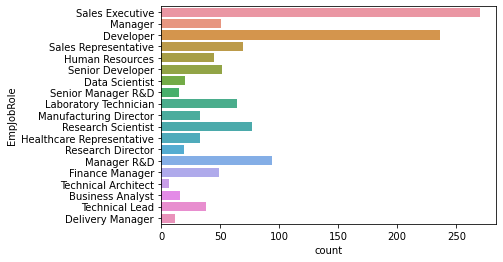

In [16]:
sns.countplot(y=df['EmpJobRole'])

We can see majority of the employee's are from the 
*   Sales Executive department
*   Developer



<AxesSubplot:xlabel='count', ylabel='EmpDepartment'>

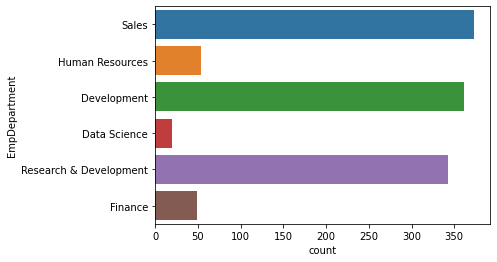

In [17]:
sns.countplot(y=df['EmpDepartment'])

<h1>Department Wise Performance<h1>

C:\Users\Anand\.conda\envs\aimethodology\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Most number of Rating')

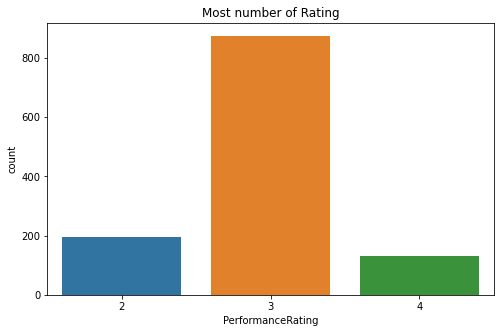

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(df['PerformanceRating'])
plt.title("Most number of Rating")

Text(0.5, 1.0, 'Performance Rating based on Department')

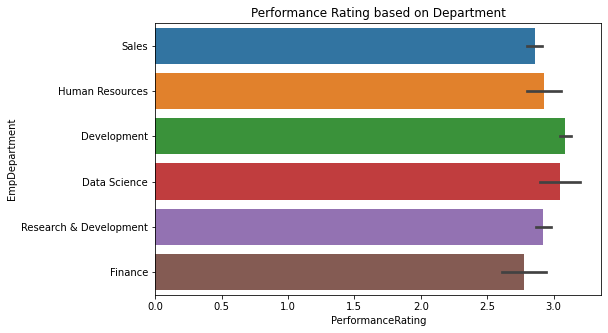

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(y=df['EmpDepartment'],x=df['PerformanceRating'])
plt.title("Performance Rating based on Department")

The development team has the **highest** performance rating among other job roles

<h2>Performance based on gender</h2>

Let us understand the overall strength of both the genders

C:\Users\Anand\.conda\envs\aimethodology\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Overall strength')

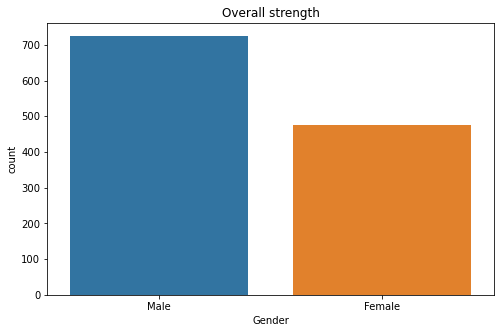

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(df['Gender'])
plt.title("Overall strength")

Text(0.5, 1.0, 'Performance Rating based on Gender')

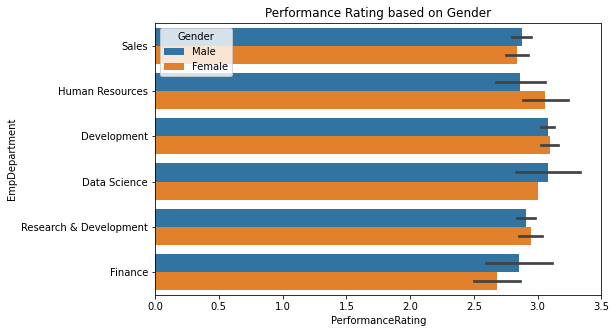

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(x="PerformanceRating", y="EmpDepartment", hue="Gender", data=df)
plt.title("Performance Rating based on Gender")

We can see that , 
*   **Male have higher** performance rating in the sales department
*   **Females have higher** performance rating in the HR department
*   **Male & Female** have almost the same performance rating in the development team
*   **Male have higher** performance rating in the data science department
*   **Male & Female** have almost equal performance in the R&D team
*   **Male has outperformed female** in the finance department









<h1>Department wise Performance</h2>

<h3>Sales</h3>

In [22]:
sales = df.loc[df['EmpDepartment']=="Sales"]

C:\Users\Anand\.conda\envs\aimethodology\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Overall strength in Sales')

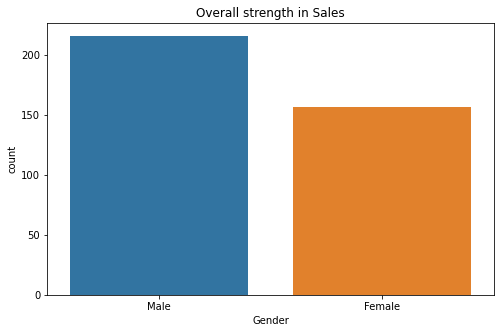

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(sales['Gender'])
plt.title("Overall strength in Sales")

In [24]:
sales.groupby(by=['PerformanceRating','EmpJobRole']).mean()

Age  DistanceFromHome  \
PerformanceRating EmpJobRole                                          
2                 Manager               48.363636          4.272727   
                  Sales Executive       36.953125         10.859375   
                  Sales Representative  31.000000          8.416667   
3                 Manager               47.437500         10.125000   
                  Sales Executive       36.679558          9.182320   
                  Sales Representative  30.481481          8.351852   
4                 Manager               45.714286          9.714286   
                  Sales Executive       35.280000          8.720000   
                  Sales Representative  27.666667          4.333333   

                                        EmpEducationLevel  \
PerformanceRating EmpJobRole                                
2                 Manager                        3.363636   
                  Sales Executive                2.984375   
                  Sales Representative           2.416667   
3                 Manager                        2.937500   
                  Sales Executive                3.000000   
                  Sales Representative           2.481481   
4                 Manager                        3.285714   
                  Sales Executive                3.120000   
                  Sales Representative           2.000000   

                                        EmpEnvironmentSatisfaction  \
PerformanceRating EmpJobRole                                         
2                 Manager                                 1.454545   
                  Sales Executive                         1.625000   
                  Sales Representative                    1.500000   
3                 Manager                                 3.125000   
                  Sales Executive                         2.977901   
                  Sales Representative                    2.888889   
4                 Manager                                 3.428571   
                  Sales Executive                         2.880000   
                  Sales Representative                    3.333333   

                                        EmpHourlyRate  EmpJobInvolvement  \
PerformanceRating EmpJobRole                                               
2                 Manager                   76.818182           2.454545   
                  Sales Executive           65.843750           2.625000   
                  Sales Representative      64.083333           2.333333   
3                 Manager                   65.812500           2.750000   
                  Sales Executive           65.116022           2.729282   
                  Sales Representative      64.500000           2.703704   
4                 Manager                   65.285714           2.571429   
                  Sales Executive           60.520000           2.760000   
                  Sales Representative      81.333333           2.333333   

                                        EmpJobLevel  EmpJobSatisfaction  \
PerformanceRating EmpJobRole                                              
2                 Manager                  4.545455            2.363636   
                  Sales Executive          2.421875            2.640625   
                  Sales Representative     1.166667            2.833333   
3                 Manager                  4.125000            3.187500   
                  Sales Executive          2.314917            2.767956   
                  Sales Representative     1.074074            2.722222   
4                 Manager                  4.285714            2.714286   
                  Sales Executive          2.120000            3.120000   
                  Sales Representative     1.000000            2.333333   

                                        NumCompaniesWorked  \
PerformanceRating EmpJobRole                                 
2                 Manager         

Text(0.5, 1.0, 'Performance Rating in the Sales Department')

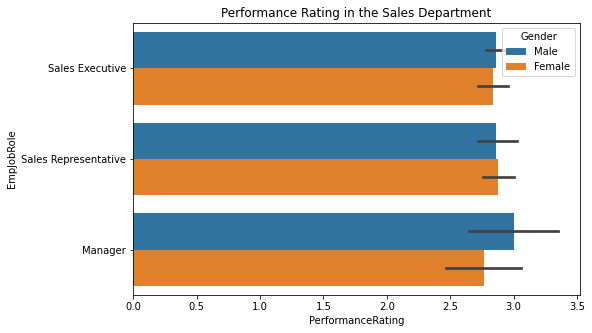

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(y="EmpJobRole",x="PerformanceRating",hue="Gender", data=sales)
plt.title("Performance Rating in the Sales Department")

In terms of manager , male has a higher performance rating than female , other than that , the rest of the roles share the same performance rating

In [26]:
df['EmpDepartment'].value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

<h3>Developer</h3>

In [27]:
developer = df.loc[df['EmpDepartment']=="Development"]

C:\Users\Anand\.conda\envs\aimethodology\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Overall strength in Development')

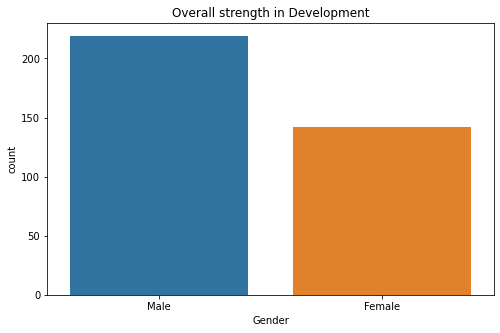

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(developer['Gender'])
plt.title('Overall strength in Development')

In [29]:
developer.groupby(by=['PerformanceRating','EmpJobRole'])['Age','EmpJobInvolvement','TotalWorkExperienceInYears','EmpJobSatisfaction',
                                                         'EmpEnvironmentSatisfaction'].mean()

C:\Users\Anand\AppData\Local\Temp\ipykernel_16164\133320624.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  developer.groupby(by=['PerformanceRating','EmpJobRole'])['Age','EmpJobInvolvement','TotalWorkExperienceInYears','EmpJobSatisfaction',


Age  EmpJobInvolvement  \
PerformanceRating EmpJobRole                                          
2                 Developer            36.833333           2.833333   
                  Senior Developer     34.166667           3.166667   
                  Technical Lead       31.000000           3.000000   
3                 Business Analyst     35.153846           2.538462   
                  Delivery Manager     38.333333           3.083333   
                  Developer            36.869347           2.773869   
                  Senior Developer     36.425000           2.750000   
                  Technical Architect  34.000000           2.857143   
                  Technical Lead       38.696970           2.939394   
4                 Business Analyst     38.666667           2.000000   
                  Developer            32.967742           2.645161   
                  Senior Developer     42.000000           3.166667   
                  Technical Lead       39.750000           3.000000   

                                       TotalWorkExperienceInYears  \
PerformanceRating EmpJobRole                                        
2                 Developer                             13.833333   
                  Senior Developer                      13.833333   
                  Technical Lead                         9.000000   
3                 Business Analyst                      11.076923   
                  Delivery Manager                      14.833333   
                  Developer                             10.753769   
                  Senior Developer                      12.725000   
                  Technical Architect                    4.285714   
                  Technical Lead                        11.575758   
4                 Business Analyst                      10.000000   
                  Developer                              9.322581   
                  Senior Developer                      11.500000   
                  Technical Lead                         7.000000   

                                       EmpJobSatisfaction  \
PerformanceRating EmpJobRole                                
2                 Developer                      2.833333   
                  Senior Developer               2.833333   
                  Technical Lead                 3.000000   
3                 Business Analyst               2.384615   
                  Delivery Manager               2.750000   
                  Developer                      2.733668   
                  Senior Developer               2.825000   
                  Technical Architect            2.714286   
                  Technical Lead                 2.787879   
4                 Business Analyst               2.666667   
                  Developer                      2.774194   
                  Senior Developer               2.666667   
                  Technical Lead                 3.250000   

                                       EmpEnvironmentSatisfaction  
PerformanceRating EmpJobRole                                       
2                 Developer                              1.166667  
                  Senior Developer                       1.666667  
                  Technical Lead                         2.000000  
3                 Business Analyst                       2.384615  
                  Delivery Manager                       3.333333  
                  Developer                              2.557789  
                  Senior Developer                       3.125000  
                  Technical Architect                    3.285714  
                  Technical Lead                         3.060606  
4                 Business Analyst                       2.000000  
                  Developer                              2.967742  
                  Senior Developer                       3.500000  
                  Technical Lead                         2.750000

Text(0.5, 1.0, 'Performance Rating in the Development Department')

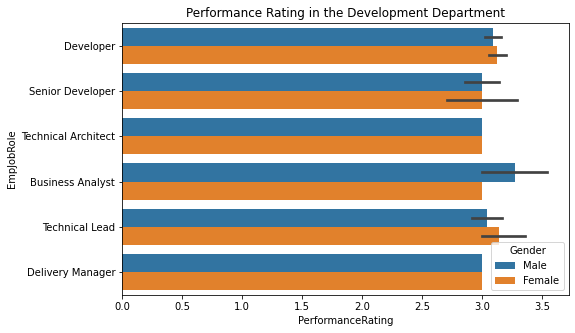

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(y="EmpJobRole",x="PerformanceRating",hue='Gender',data=developer)
plt.title("Performance Rating in the Development Department")

Performance rating the development team is almost the same with an average performance rating of 3 , meaning that all of them are satisfied with the job

<h3>Research & Development</h3>

In [31]:
rnd = df.loc[df['EmpDepartment']=="Research & Development"]

C:\Users\Anand\.conda\envs\aimethodology\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Overall strength in R&D')

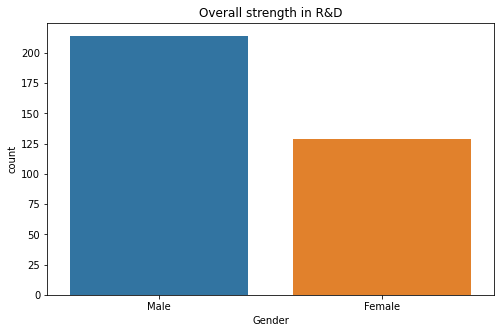

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(rnd['Gender'])
plt.title('Overall strength in R&D')

In [33]:
rnd.groupby(by=['PerformanceRating','EmpJobRole'])['Age','EmpJobInvolvement','TotalWorkExperienceInYears','EmpJobSatisfaction',
                                                         'EmpEnvironmentSatisfaction'].mean()

C:\Users\Anand\AppData\Local\Temp\ipykernel_16164\3894952035.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rnd.groupby(by=['PerformanceRating','EmpJobRole'])['Age','EmpJobInvolvement','TotalWorkExperienceInYears','EmpJobSatisfaction',


Age  EmpJobInvolvement  \
PerformanceRating EmpJobRole                                                
2                 Healthcare Representative  40.250000           2.875000   
                  Laboratory Technician      32.785714           2.714286   
                  Manager R&D                42.058824           3.117647   
                  Manufacturing Director     35.000000           2.333333   
                  Research Director          36.600000           2.400000   
                  Research Scientist         39.941176           2.764706   
                  Senior Manager R&D         30.500000           2.250000   
3                 Healthcare Representative  38.454545           2.681818   
                  Laboratory Technician      33.911111           2.622222   
                  Manager                    45.333333           2.500000   
                  Manager R&D                37.590909           2.712121   
                  Manufacturing Director     41.071429           2.678571   
                  Research Director          43.545455           2.363636   
                  Research Scientist         34.282609           2.695652   
                  Senior Manager R&D         39.300000           2.900000   
4                 Healthcare Representative  50.000000           2.000000   
                  Laboratory Technician      37.000000           2.400000   
                  Manager                    50.000000           2.500000   
                  Manager R&D                38.545455           2.818182   
                  Manufacturing Director     33.500000           2.000000   
                  Research Director          38.666667           3.000000   
                  Research Scientist         32.642857           2.714286   
                  Senior Manager R&D         46.000000           2.000000   

                                             TotalWorkExperienceInYears  \
PerformanceRating EmpJobRole                                              
2                 Healthcare Representative                   13.500000   
                  Laboratory Technician                        7.714286   
                  Manager R&D                                 16.529412   
                  Manufacturing Director                      10.000000   
                  Research Director                           17.200000   
                  Research Scientist                          10.294118   
                  Senior Manager R&D                           7.750000   
3                 Healthcare Representative                   13.409091   
                  Laboratory Technician                        7.177778   
                  Manager                                     21.500000   
                  Manager R&D                                 11.833333   
                  Manufacturing Director                      16.214286   
                  Research Director                           21.727273   
                  Research Scientist                           8.065217   
                  Senior Manager R&D                          13.300000   
4                 Healthcare Representative                   15.333333   
                  Laboratory Technician                        6.800000   
                  Manager                                     26.500000   
                  Manager R&D                                 13.272727   
                  Manufacturing Director                      13.000000   
                  Research Director                           18.000000   
                  Research Scientist                           7.642857   
                  Senior Manager R&D                          19.000000   

                                             EmpJobSatisfaction  \
PerformanceRating EmpJobRole                                      
2                 Healthcare Representative            2.625000   
                  Laboratory Technician         

Text(0.5, 1.0, 'Performance Rating in the Research & Development Department')

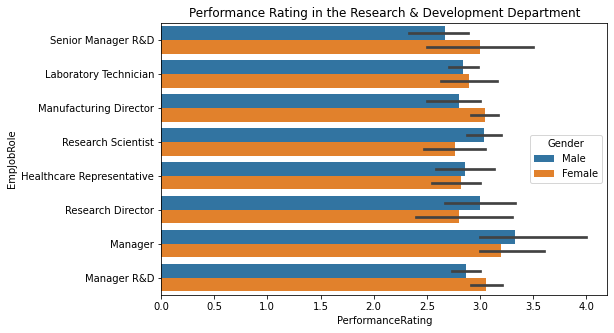

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(y="EmpJobRole",x="PerformanceRating",hue='Gender',data=rnd)
plt.title("Performance Rating in the Research & Development Department")

Manager has a higher performance rating , compared to the rest of the roles in the R&D team and the rest of the roles share a similar performance rating which is about 2.5 - 3

<h3>Human Resource</h3>

In [35]:
human_resource = df.loc[df['EmpDepartment']=="Human Resources"]

C:\Users\Anand\.conda\envs\aimethodology\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Overall strength in Human Resource')

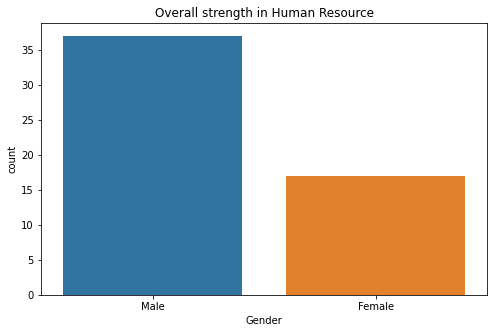

In [36]:
plt.figure(figsize=(8,5))
sns.countplot(human_resource['Gender'])
plt.title('Overall strength in Human Resource')

In [37]:

human_resource.groupby(by=['PerformanceRating','EmpJobRole'])['Age','EmpJobInvolvement','TotalWorkExperienceInYears','EmpJobSatisfaction',
                                                         'EmpEnvironmentSatisfaction'].mean()

C:\Users\Anand\AppData\Local\Temp\ipykernel_16164\893297457.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  human_resource.groupby(by=['PerformanceRating','EmpJobRole'])['Age','EmpJobInvolvement','TotalWorkExperienceInYears','EmpJobSatisfaction',


Age  EmpJobInvolvement  \
PerformanceRating EmpJobRole                                      
2                 Human Resources  37.888889           2.777778   
                  Manager          50.000000           3.000000   
3                 Human Resources  35.870968           2.709677   
                  Manager          49.428571           3.142857   
4                 Human Resources  37.200000           2.600000   
                  Manager          40.000000           3.000000   

                                   TotalWorkExperienceInYears  \
PerformanceRating EmpJobRole                                    
2                 Human Resources                    8.777778   
                  Manager                           32.000000   
3                 Human Resources                    8.580645   
                  Manager                           28.285714   
4                 Human Resources                    8.800000   
                  Manager                           21.000000   

                                   EmpJobSatisfaction  \
PerformanceRating EmpJobRole                            
2                 Human Resources            2.666667   
                  Manager                    2.000000   
3                 Human Resources            2.516129   
                  Manager                    2.571429   
4                 Human Resources            2.400000   
                  Manager                    4.000000   

                                   EmpEnvironmentSatisfaction  
PerformanceRating EmpJobRole                                   
2                 Human Resources                    1.666667  
                  Manager                            1.000000  
3                 Human Resources                    2.741935  
                  Manager                            3.285714  
4                 Human Resources                    3.000000  
                  Manager                            3.000000

Text(0.5, 1.0, 'Performance Rating in the Human Resource Department')

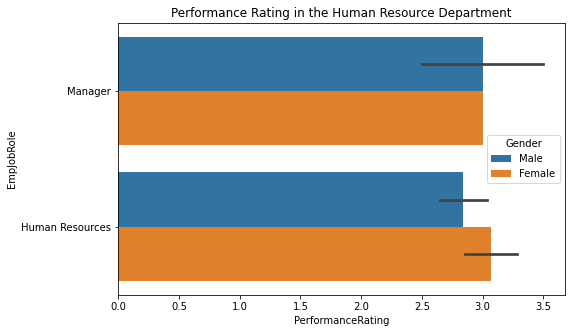

In [38]:
plt.figure(figsize=(8,5))
sns.barplot(y="EmpJobRole",x="PerformanceRating",hue='Gender',data=human_resource)
plt.title("Performance Rating in the Human Resource Department")

**Females** compartively have higher performance rating that male in terms of HR  as well as well as manager 

<h1>Factors Affecting Performance Rating</h1>


We will plot the confusion matrix and see what are the factor's that affects the performance rating of the employee

<AxesSubplot:>

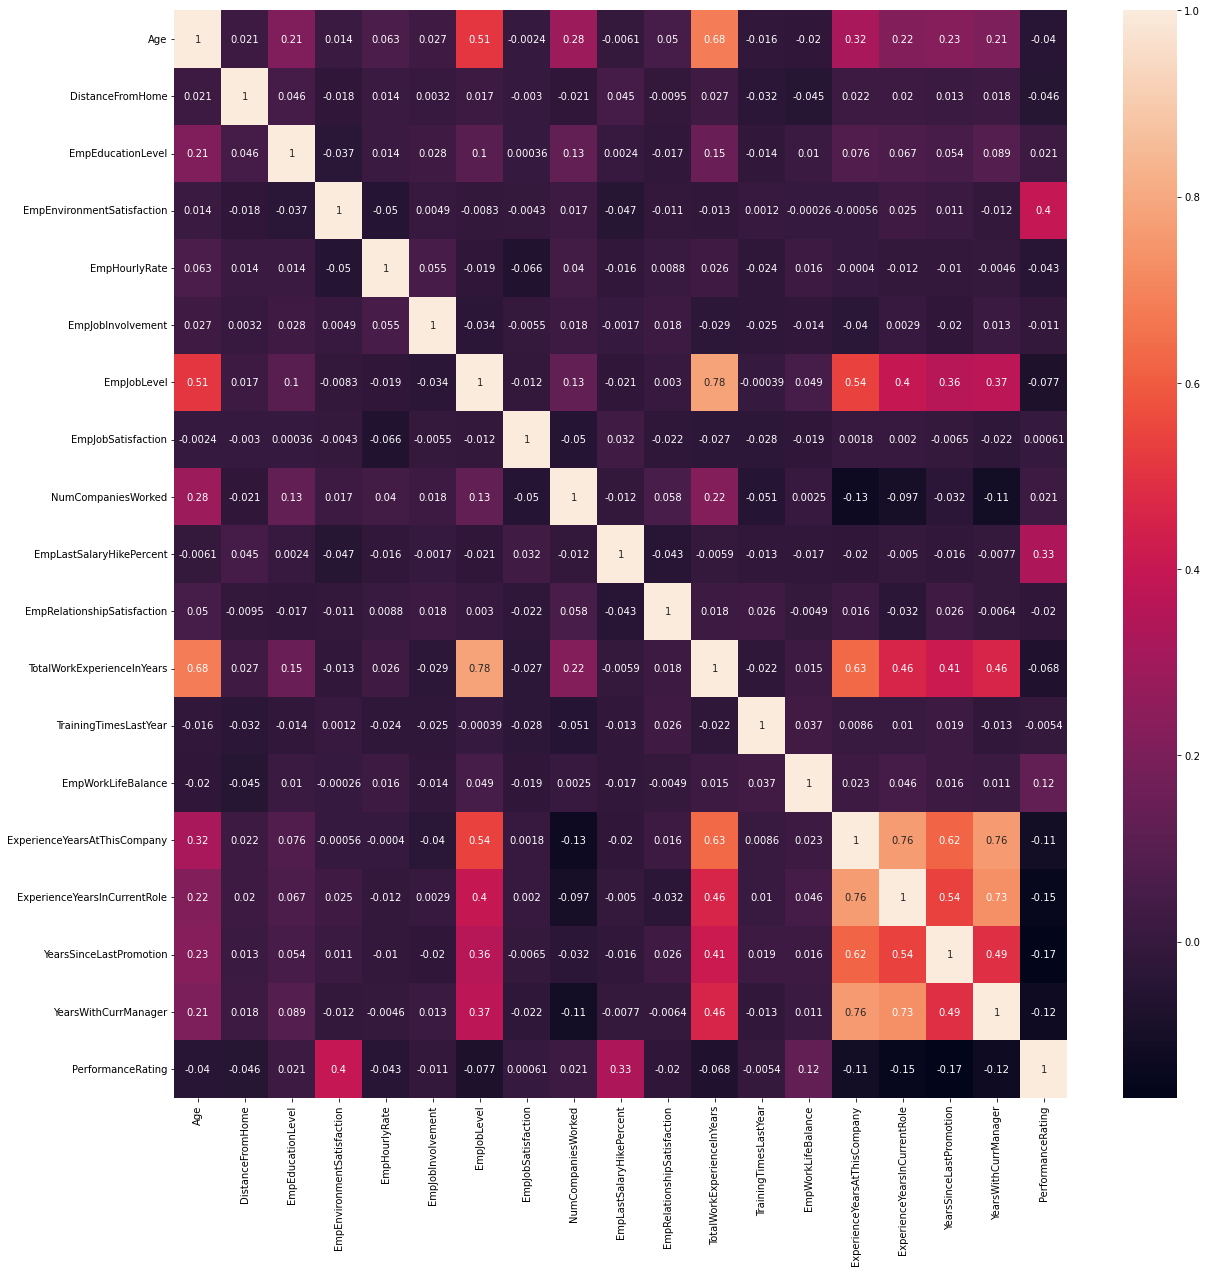

In [39]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

We can see that these variables play an important role that affects the performance rating of the employee (They have a strong co-relation).

*   Employment Environment Satisfaction
*   Work life balance
*   Last Salary Hike Percent & Work life balance

Let us perform an analysis on these variables and understand more about the factors that affect's the employee's performance rating.

In [40]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


<h2>Performance Rating based on Environment satisfaction</h2>

In [41]:
df.groupby(by=['EmpEnvironmentSatisfaction'])['PerformanceRating'].mean()

EmpEnvironmentSatisfaction
1    2.665217
2    2.652893
3    3.138965
4    3.132964
Name: PerformanceRating, dtype: float64

Text(0.5, 1.0, 'Performance rating with respect to environemnt satisfaction')

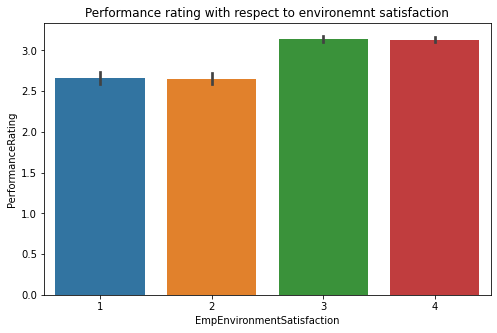

In [42]:
plt.figure(figsize=(8,5))
sns.barplot(x = df['EmpEnvironmentSatisfaction'] , y=df['PerformanceRating'])
plt.title("Performance rating with respect to environemnt satisfaction")

We can see that people with higher environment satisfaction has better performance rating , which tells us that the work enviornment is one of the factor's that affect's the performance rating of the employee.

<h2>Performance based on worklife balance</h2>

In [43]:
df.groupby(by=['EmpWorkLifeBalance'])['PerformanceRating'].mean()

EmpWorkLifeBalance
1    2.750000
2    2.918367
3    2.950481
4    3.121739
Name: PerformanceRating, dtype: float64

Text(0.5, 1.0, 'Performance rating with respect to Work life balance')

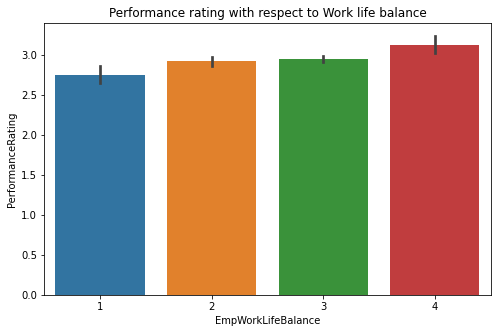

In [44]:
plt.figure(figsize=(8,5))
sns.barplot(x = df['EmpWorkLifeBalance'] , y=df['PerformanceRating'])
plt.title("Performance rating with respect to Work life balance")

So is the case with work life balance , employee's who have a higher work life balance have a higher performance rating

<h2>Performance based on Last salary hike percent</h2>

In [45]:
df.groupby(by='EmpLastSalaryHikePercent')['PerformanceRating'].mean()

EmpLastSalaryHikePercent
11    2.840237
12    2.819355
13    2.857143
14    2.860465
15    2.914634
16    2.852941
17    2.910448
18    2.863014
19    2.873016
20    3.360000
21    3.588235
22    3.425532
23    3.523810
24    3.500000
25    3.307692
Name: PerformanceRating, dtype: float64

C:\Users\Anand\.conda\envs\aimethodology\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Performance rating based on Employee last salary hike')

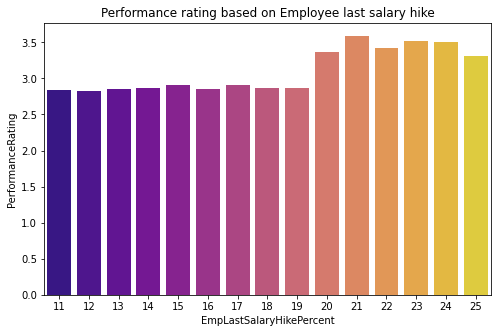

In [46]:
plt.figure(figsize=(8,5))
sns.barplot(df['EmpLastSalaryHikePercent'], df['PerformanceRating'],palette ="plasma",ci=None)
plt.title("Performance rating based on Employee last salary hike")

A salary hike can also motivate the employee's to perform well , we can see that 20-25 have a decent performance rating

<h2>Other factors</h2>

Now we will look at other factors that might affect the performance rating of the employee.

In [47]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


Text(0.5, 1.0, 'Performance rating wrt Business travel frequency')

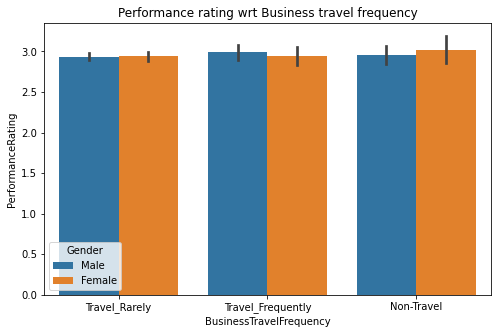

In [48]:
plt.figure(figsize=(8,5))
sns.barplot(x='BusinessTravelFrequency',y='PerformanceRating',data=df,hue='Gender')
plt.title("Performance rating wrt Business travel frequency")

Text(0.5, 1.0, 'Performance rating wrt Hourly rate')

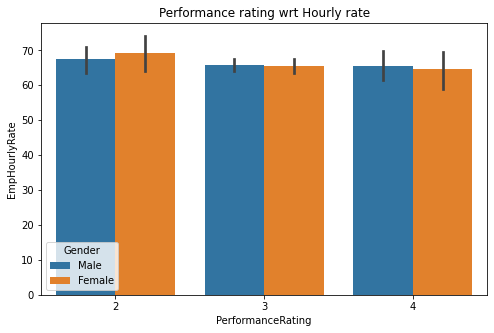

In [49]:
plt.figure(figsize=(8,5))
sns.barplot(y='EmpHourlyRate',x='PerformanceRating',data=df,hue='Gender')
plt.title("Performance rating wrt Hourly rate")

Text(0.5, 1.0, 'Performance rating wrt OverTime')

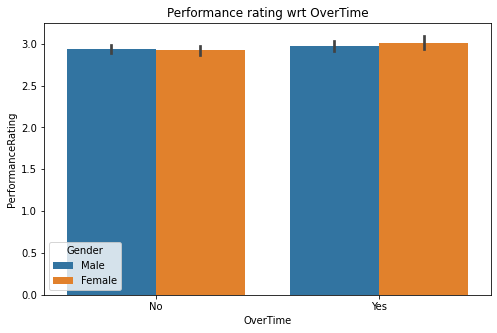

In [50]:
plt.figure(figsize=(8,5))
sns.barplot(x='OverTime',y='PerformanceRating',data=df,hue='Gender')
plt.title("Performance rating wrt OverTime")

Text(0.5, 1.0, 'Performance rating wrt Total work experience')

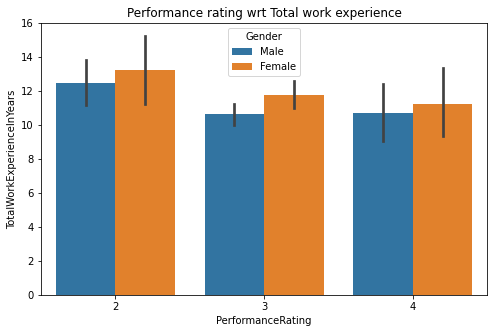

In [51]:
plt.figure(figsize=(8,5))
sns.barplot(y='TotalWorkExperienceInYears',x='PerformanceRating',data=df,hue='Gender')
plt.title("Performance rating wrt Total work experience")

We can see that people with higher experience have low performance rating , and people with lower year's of experience have good performance rating

Text(0.5, 1.0, 'Performance rating wrt years since last promotion')

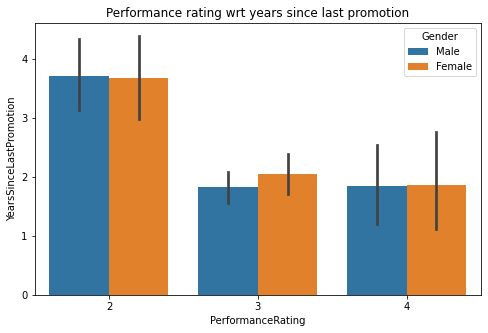

In [52]:
plt.figure(figsize=(8,5))
sns.barplot(y='YearsSinceLastPromotion',x='PerformanceRating',data=df,hue='Gender')
plt.title("Performance rating wrt years since last promotion")

Text(0.5, 1.0, 'Performance rating wrt years experience with this company')

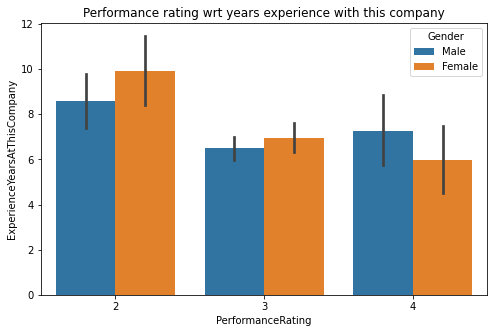

In [53]:
plt.figure(figsize=(8,5))
sns.barplot(y='ExperienceYearsAtThisCompany',x='PerformanceRating',data=df,hue='Gender')
plt.title("Performance rating wrt years experience with this company")

Higher the experience lower the performance rating , probably because of the pressure that the higher experience of employee has & the work life balance

Text(0.5, 1.0, 'Performance rating wrt Emp job level')

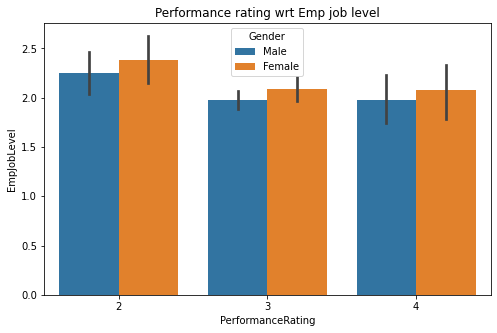

In [54]:
plt.figure(figsize=(8,5))
sns.barplot(y='EmpJobLevel',x='PerformanceRating',data=df,hue='Gender')
plt.title("Performance rating wrt Emp job level")

Text(0.5, 1.0, 'Performance rating wrt years with current manager')

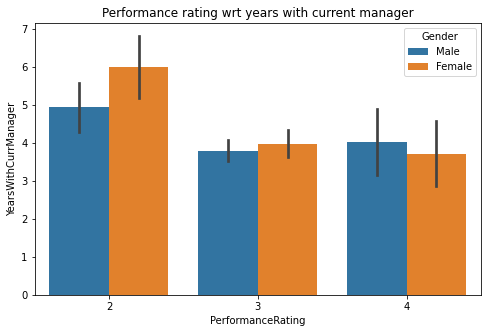

In [55]:
plt.figure(figsize=(8,5))
sns.barplot(y='YearsWithCurrManager',x='PerformanceRating',data=df,hue='Gender')
plt.title("Performance rating wrt years with current manager")

<h1>Model Building</h1>

For this problem i will be using the Random forest classifier and get the best hyperparameters using Randomized search CV

<h3>Importing the required library's</h3>

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,scale, StandardScaler

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

<h3>Encoding the labels</h3>

In [57]:
enc=LabelEncoder()
newdf=df.apply(enc.fit_transform)

In [58]:
newdf.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,0,14,1,2,2,5,13,2,9,2,...,3,10,2,1,10,7,0,8,0,1
1,1,29,1,2,2,5,13,2,13,3,...,3,20,2,2,7,7,1,7,0,1
2,2,22,1,1,1,5,13,1,4,3,...,2,20,2,2,18,13,1,12,0,2
3,3,23,1,0,0,3,8,2,9,3,...,1,23,2,1,21,6,12,6,0,1
4,4,42,1,2,2,5,13,2,15,3,...,3,10,1,2,2,2,2,2,0,1


In [59]:
target = newdf['PerformanceRating']
train = newdf.drop(['PerformanceRating','EmpNumber'],axis=1).values

In [60]:
x_train , x_test , y_train , y_test = train_test_split(train,target,test_size=0.2)

In [61]:
rfc = RandomForestClassifier()

<h3>Fitting the data</h3>

In [62]:
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [63]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Anand\.conda\envs\aimethodology\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [64]:
predict = rf_random.predict(x_test)

<h2>Classification Report</h2>

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
print (f"The accuracy score is : {accuracy_score(y_test,predict)*100}%")

The accuracy score is : 95.0%


In [67]:
print (classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.96      0.97      0.97       180
           2       0.96      0.93      0.94        27

    accuracy                           0.95       240
   macro avg       0.93      0.92      0.92       240
weighted avg       0.95      0.95      0.95       240



Our model has achieved a precision score of 90 & recall score of 90

<h2>Recommendations</h2>

*   Improve the work environment for the employee's to get the feel of the work
*   Ensuring that the employee's have work life balance.It's shown that employee's having a good balance have a good performance rating
*   A Salary hike can motivate the employee's to have good performance rating.



